In [0]:
from sklearn import tree
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Obtendo a base de dados**

In [0]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data -O credit_approval.csv

--2019-11-21 00:04:45--  http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘credit_approval.csv’

credit_approval.csv 100%[===================>]  31.46K  --.-KB/s    in 0.07s   

2019-11-21 00:04:47 (477 KB/s) - ‘credit_approval.csv’ saved [32218/32218]



### **Lendo a base de dados**

In [0]:
columns = ['gender', 'age', 'debt', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'citizen', 'zipcode', 'income', 'class']

In [0]:
df = pd.read_csv('credit_approval.csv', names=columns)

In [0]:
df.head()

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### **Fazendo algum preprocessamento**

In [0]:
df.replace('?',np.NaN, inplace=True)

In [0]:
df.dropna(inplace=True)

### **Sumetendo a um modelo de árvore de decisão**

In [0]:
data_columns = ['gender', 'age', 'debt', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'yearsemployed', 'priordefault', 'employed', 'creditccore', 'driverslicense', 'citizen', 'income']
continuous_data_columns = ['age', 'debt', 'yearsemployed', 'creditscore', 'income']
target_columns = ['class']

In [0]:
X = df[continuous_data_columns]
y = df[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=20)
clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf, feature_names=continuous_data_columns, class_names=df['class'], label='root')

'digraph Tree {\nnode [shape=box] ;\n0 [label="creditscore <= 2.5\\ngini = 0.497\\nsamples = 437\\nvalue = [201, 236]\\nclass = +"] ;\n1 [label="yearsemployed <= 1.293\\n0.422\\n314\\n[95, 219]\\n+"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="income <= 5676.0\\n0.303\\n199\\n[37, 162]\\n+"] ;\n1 -> 2 ;\n3 [label="0.281\\n195\\n[33, 162]\\n+"] ;\n2 -> 3 ;\n4 [label="0.0\\n4\\n[4, 0]\\n+"] ;\n2 -> 4 ;\n5 [label="income <= 112.5\\n0.5\\n115\\n[58, 57]\\n+"] ;\n1 -> 5 ;\n6 [label="0.487\\n86\\n[36, 50]\\n+"] ;\n5 -> 6 ;\n7 [label="0.366\\n29\\n[22, 7]\\n+"] ;\n5 -> 7 ;\n8 [label="yearsemployed <= 0.105\\n0.238\\n123\\n[106, 17]\\n+"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="0.497\\n13\\n[6, 7]\\n+"] ;\n8 -> 9 ;\n10 [label="age <= 17.58\\n0.165\\n110\\n[100, 10]\\n+"] ;\n8 -> 10 ;\n11 [label="0.444\\n3\\n[1, 2]\\n+"] ;\n10 -> 11 ;\n12 [label="0.138\\n107\\n[99, 8]\\n+"] ;\n10 -> 12 ;\n}'

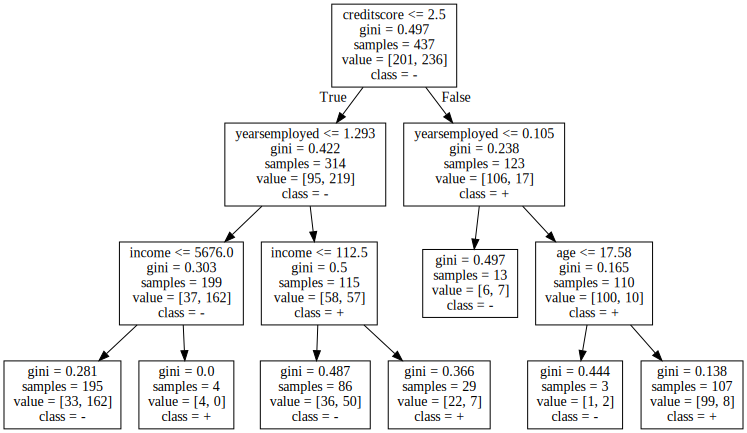

In [0]:
dot_data = tree.export_graphviz(clf, feature_names=continuous_data_columns, class_names=['+', '-'], precision=3,  label='all')  
graph = graphviz.Source(dot_data)  
graph 

### **Validando nosso primeiro modelo**

In [0]:
y_predicted = clf.predict(X_test)
y_true = y_test['class'].tolist()

In [0]:
accuracy_score(y_true, y_predicted)

0.7916666666666666

## **Parabéns, você acabou de executar o seu primeiro modelo de machine learning.**

![alt text](https://miro.medium.com/max/1000/1*x3waP2IFomhxvphh_QOL2A.jpeg)

## **Mas será que seus dados categóricos não teriam uma boa participação na sua predição?**
